In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# df = pd.read_csv("../degree 8 up to 11.csv")
df = pd.read_csv("../degree 12 up to 3.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'polynomial', 'degree', 'Mahler measure',
       'roots outside unit circle', 'number of real roots', 'trace poly',
       'Galois of trace', 'discriminant', 'trace galois order'],
      dtype='object')

In [62]:
len(df)

88945

In [4]:
df["discriminant"] = df["discriminant"].astype(np.double).abs()

Text(6.25000000000000, 650, '88945 polynomials analyzed')

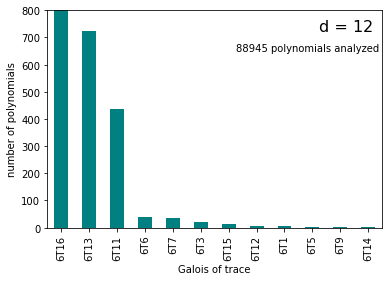

In [65]:
df["Galois of trace"].value_counts().plot.bar(ylim=(0, 800), color = "teal", ylabel = "number of polynomials")
plt.text(9.25, 725, "d = 12", fontsize = 16)
plt.text(6.25, 650, "88945 polynomials analyzed")

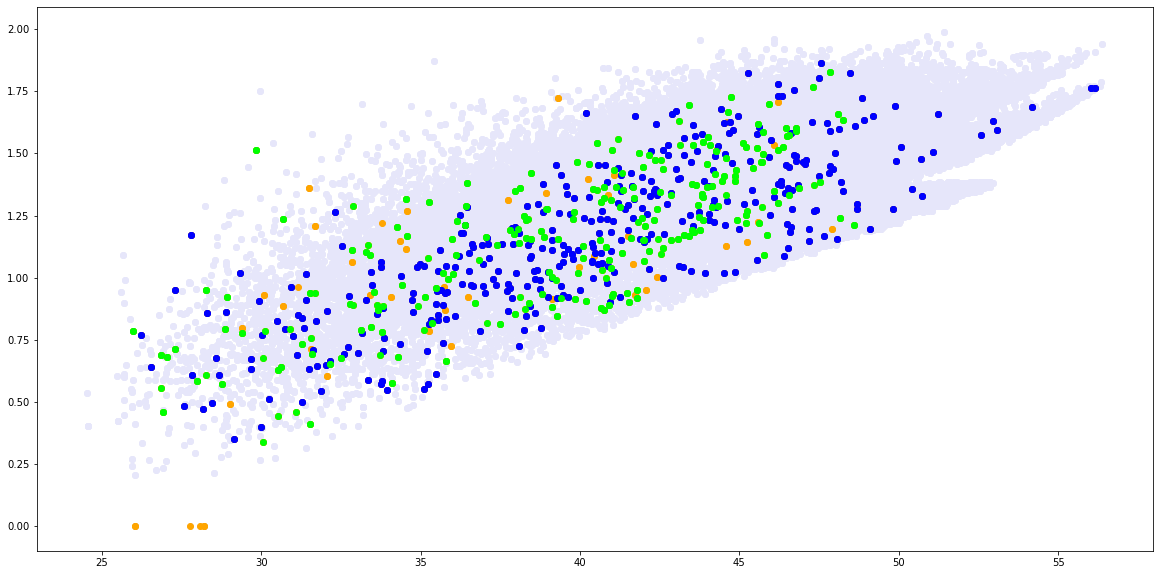

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(np.log(df["discriminant"]),np.log(df["Mahler measure"]), color = "lavender")
# plt.scatter(np.log(df[df["Galois of trace"]!="5T5"]["discriminant"]),df[df["Galois of trace"]!="5T5"]["Mahler measure"], color = "blue")
# plt.scatter(np.log(df[df["Galois of trace"]=="6T16"]["discriminant"]),np.log(df[df["Galois of trace"]=="6T16"]["Mahler measure"]), color = "yellow")
plt.scatter(np.log(df[df["Galois of trace"]!="6T16"]["discriminant"]),np.log(df[df["Galois of trace"]!="6T16"]["Mahler measure"]), color = "orange")
plt.scatter(np.log(df[df["Galois of trace"]=="6T13"]["discriminant"]),np.log(df[df["Galois of trace"]=="6T13"]["Mahler measure"]), color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="6T11"]["discriminant"]),np.log(df[df["Galois of trace"]=="6T11"]["Mahler measure"]), color = "lime")




In [7]:
df[df["Galois of trace"]=="6T11"].sort_values("Mahler measure")

,Unnamed: 0,polynomial,degree,Mahler measure,roots outside unit circle,number of real roots,trace poly,Galois of trace,discriminant,trace galois order
44421,44421,x^12 - x^8 + x^6 - x^4 + 1,12,1.401268,2,0,x^6 - 6*x^4 + 8*x^2 + 1,6T11,1.126424e+13,48
42726,42726,x^12 - x^10 - x^6 - x^2 + 1,12,1.506136,2,4,x^6 - 7*x^4 + 13*x^2 - 5,6T11,4.913001e+13,48
46184,46184,x^12 + x^10 + x^6 + x^2 + 1,12,1.506136,2,0,x^6 - 5*x^4 + 5*x^2 + 1,6T11,4.913001e+13,48
46154,46154,x^12 + x^10 - x^8 - x^6 - x^4 + x^2 + 1,12,1.556030,2,0,x^6 - 5*x^4 + 4*x^2 + 1,6T11,1.786868e+13,48
44422,44422,x^12 - x^8 + 2*x^6 - x^4 + 1,12,1.582347,2,0,x^6 - 6*x^4 + 8*x^2 + 2,6T11,3.144320e+13,48
...,...,...,...,...,...,...,...,...,...,...
39303,39303,x^12 - 3*x^10 + 3*x^8 + 3*x^6 + 3*x^4 - 3*x^2 + 1,12,5.622058,4,0,x^6 - 9*x^4 + 24*x^2 - 11,6T11,2.700166e+19,48
88476,88476,x^12 + 3*x^11 + 3*x^10 + 2*x^9 - 3*x^8 + 3*x^7...,12,5.845617,3,2,x^6 + 3*x^5 - 3*x^4 - 13*x^3 - 6*x^2 + 12*x + 8,6T11,3.538800e+20,48
11443,11443,x^12 - 3*x^11 + 3*x^10 - 2*x^9 - 3*x^8 - 3*x^7...,12,5.845617,3,2,x^6 - 3*x^5 - 3*x^4 + 13*x^3 - 6*x^2 - 12*x + 8,6T11,3.538800e+20,48
86617,86617,x^12 + 3*x^11 + 2*x^10 + 2*x^9 - 2*x^8 - 3*x^7...,12,6.226721,4,4,x^6 + 3*x^5 - 4*x^4 - 13*x^3 - x^2 + 6*x + 9,6T11,6.011878e+20,48


In [8]:
# computes the galois group for the given polynomial.
def getGalois(poly):
    # make sure the polynomial is not reducible before
    # computing its Galois group
    # assert poly.is_irreducible()
    K.<a> = NumberField(poly)
    G = K.galois_group()
    return G.transitive_label()

In [9]:
R.<x> = PolynomialRing(QQ)
poly = R(x^12-x^8+x^6-x^4+1)
galois_label = getGalois(poly)

KeyboardInterrupt: 

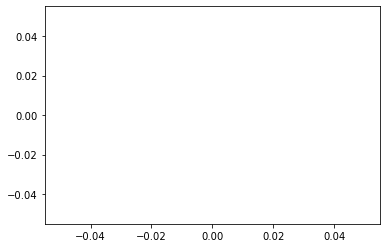

In [10]:
plt.scatter(np.log(df[df["Galois of trace"]=="5T5"]["discriminant"]),df[df["Galois of trace"]=="5T5"]["Mahler measure"], color = "blue")

In [11]:
df["Galois of poly"]

KeyError: 'Galois of poly'

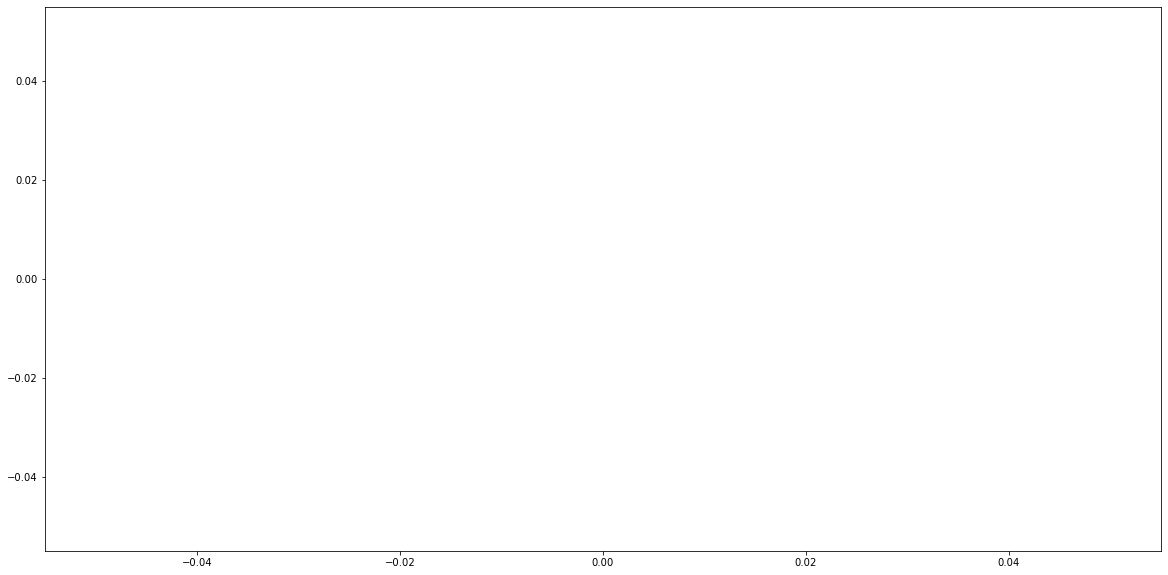

In [12]:
plt.figure(figsize=(20,10))
# plt.scatter(np.log(df["discriminant"]),np.log(df["Mahler measure"]), color = "red")
# plt.scatter(np.log(df[df["Galois of trace"]!="5T5"]["discriminant"]),df[df["Galois of trace"]!="5T5"]["Mahler measure"], color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="4T5"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T5"]["Mahler measure"]), color = "red")
plt.scatter(np.log(df[df["Galois of trace"]=="4T4"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T4"]["Mahler measure"]), color = "yellow")
plt.scatter(np.log(df[df["Galois of trace"]=="4T3"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T3"]["Mahler measure"]), color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="4T2"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T2"]["Mahler measure"]), color = "lime")
plt.scatter(np.log(df[df["Galois of trace"]=="4T1"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T1"]["Mahler measure"]), color = "orange")


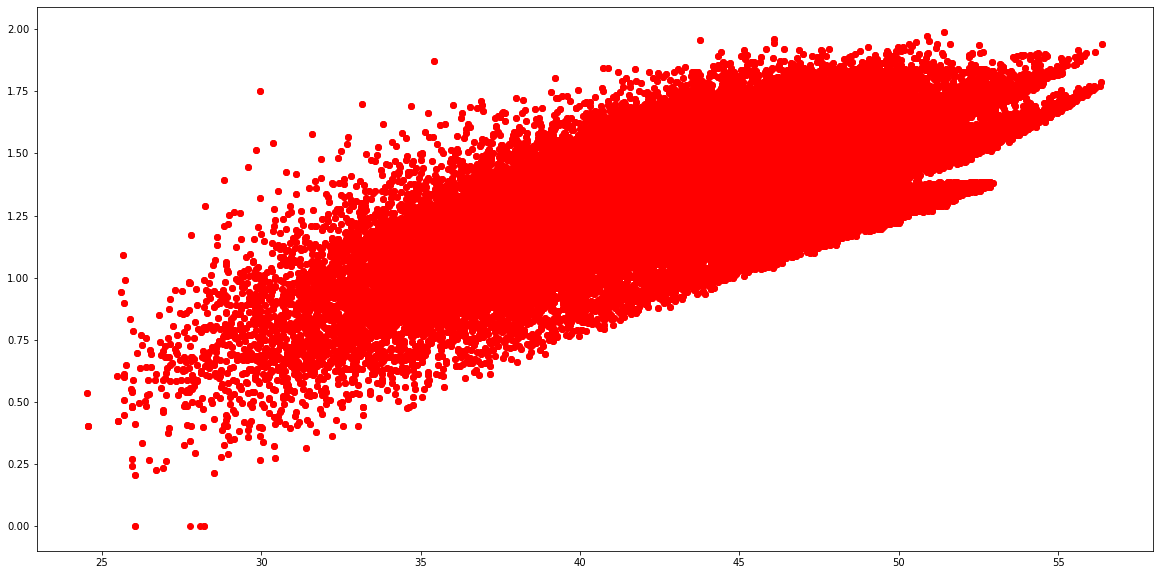

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(np.log(df["discriminant"]),np.log(df["Mahler measure"]), color = "red")
# plt.scatter(np.log(df[df["Galois of trace"]!="5T5"]["discriminant"]),df[df["Galois of trace"]!="5T5"]["Mahler measure"], color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="5T4"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T4"]["Mahler measure"]), color = "yellow")
plt.scatter(np.log(df[df["Galois of trace"]=="5T3"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T3"]["Mahler measure"]), color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="5T2"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T2"]["Mahler measure"]), color = "lime")


### Degree 12 stuff

